![](https://i.imgur.com/7ZHW4nx.png)
# Dengue Fever
## purpose
* the notebook analyse the relationship between **AST**, **ALT**, **APTT**, **Platelet** and **death**
## data
* Real data of Patient in Tainan

In [ ]:
import pandas as pd
import numpy as np
import scipy as si
import datetime
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("./dgcase.xlsx")

In [3]:
AST = pd.read_excel("./dgcase.xlsx", "AST")
ALT = pd.read_excel("./dgcase.xlsx", "ALT")
APTT = pd.read_excel("./dgcase.xlsx", "APTT")
Platelet = pd.read_excel("./dgcase.xlsx", "Platelet")


In [4]:
df.head()

,chartno,age,sex,onset_date,diag_date,death_date,is_hospitalization,Fatal
0,A1564,74,1,2015-08-31,2015-09-02,NaN,0,0
1,A1878,71,1,2015-09-09,2015-09-15,NaN,0,0
2,A8146,38,0,2015-08-11,2015-08-14,NaN,0,0
3,A8476,55,0,2015-09-17,2015-09-17,NaN,0,0
4,A15171,44,1,2015-09-28,2015-09-28,NaN,0,0


In [5]:
df['onset_month'] = pd.DatetimeIndex(df['onset_date']).month
df['onset_day'] = pd.DatetimeIndex(df['onset_date']).day
df['diag_month'] = pd.DatetimeIndex(df['diag_date']).month
df['diag_day'] = pd.DatetimeIndex(df['diag_date']).day
df['onset_time'] = 100* df['onset_month'] + df['onset_day']
df['diag_time'] = 100* df['diag_month'] + df['diag_day']


In [6]:
df['date_sub'] = 0

i = 0
for date_time_str1, date_time_str2 in zip(df['onset_date'], df['diag_date']):
    date_time_obj1 = datetime.datetime.strptime(date_time_str1, '%Y-%m-%d')
    
    date_time_obj2 = datetime.datetime.strptime(date_time_str2, '%Y-%m-%d')
    
    df['date_sub'][i] = date_time_obj2 - date_time_obj1
    
    df['date_sub'][i] = df['date_sub'][i].days
    
    i = i + 1

In [7]:
p1 = pd.merge(df, AST)
p1['AST'] = p1['value']
p1.drop(columns = 'value')
cur1_1 = p1[p1["Fatal"] == 1]

In [8]:
p2 = pd.merge(df, ALT)
p2['ALT'] = p2['value']
p2.drop(columns = 'value')
cur1_2 = p2[p2["Fatal"] == 1]

In [9]:
p3 = pd.merge(df, APTT)
p3['APTT'] = p3['value']
p3.drop(columns = 'value')
cur1_3 = p3[p3["Fatal"] == 1]

In [10]:
p4 = pd.merge(df, Platelet)
p4['Platelet'] = p4['value']
p4.drop(columns = 'value')
cur1_4 = p4[p4['Fatal'] == 1]

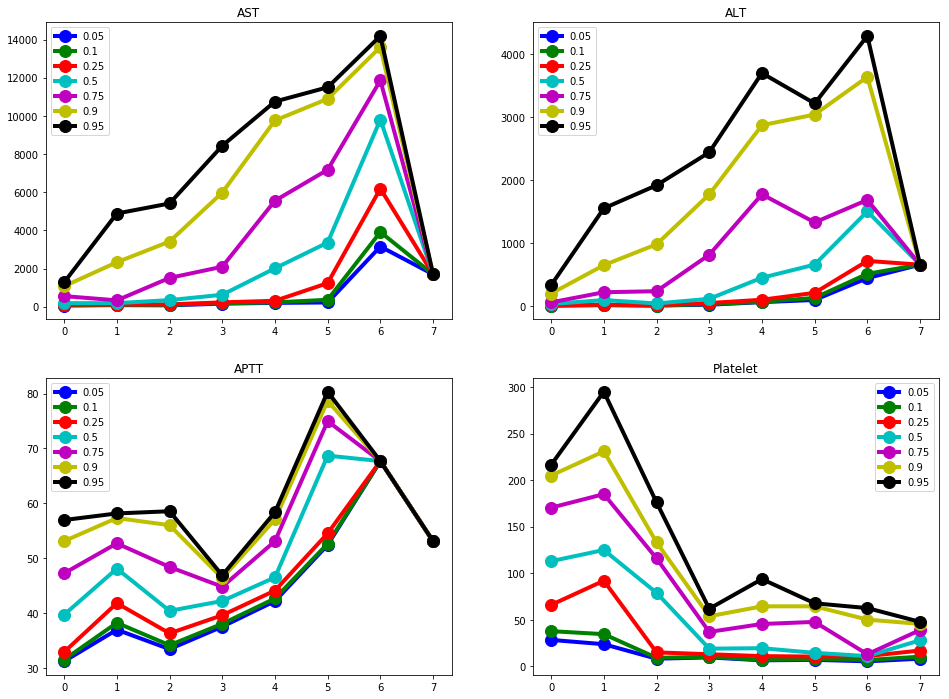

In [16]:
from matplotlib.pyplot import figure
figure(figsize=(16, 12))

data = []
plt.subplot(221)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]:
    quatiled = cur1_1.groupby('Day')['AST'].quantile(i).reset_index()
    data.append(go.Scatter(
            x = quatiled['Day'],
            y = quatiled['AST']
        ))
plt.plot( 'x', 'y', data=data[0], marker='o', color='blue', markersize=12,  linewidth=4, label = "0.05")
plt.plot( 'x', 'y', data=data[1], marker='o', color='g', markersize=12, linewidth=4, label = "0.1")
plt.plot( 'x', 'y', data=data[2], marker='o', color='r', markersize=12, linewidth=4, label = "0.25")
plt.plot( 'x', 'y', data=data[3], marker='o', color='c', markersize=12, linewidth=4, label = "0.5")
plt.plot( 'x', 'y', data=data[4], marker='o', color='m', markersize=12, linewidth=4, label = "0.75")
plt.plot( 'x', 'y', data=data[5], marker='o', color='y', markersize=12, linewidth=4, label = "0.9")
plt.plot( 'x', 'y', data=data[6], marker='o', color='k', markersize=12, linewidth=4, label = "0.95")
plt.title('AST')
plt.legend()
data = []
plt.subplot(222)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]:
    quatiled = cur1_2.groupby('Day')['ALT'].quantile(i).reset_index()
    data.append(go.Scatter(
        x = quatiled['Day'],
        y = quatiled['ALT']
    ))
plt.plot( 'x', 'y', data=data[0], marker='o', color='blue', markersize=12,  linewidth=4, label = "0.05")
plt.plot( 'x', 'y', data=data[1], marker='o', color='g', markersize=12, linewidth=4, label = "0.1")
plt.plot( 'x', 'y', data=data[2], marker='o', color='r', markersize=12, linewidth=4, label = "0.25")
plt.plot( 'x', 'y', data=data[3], marker='o', color='c', markersize=12, linewidth=4, label = "0.5")
plt.plot( 'x', 'y', data=data[4], marker='o', color='m', markersize=12, linewidth=4, label = "0.75")
plt.plot( 'x', 'y', data=data[5], marker='o', color='y', markersize=12, linewidth=4, label = "0.9")
plt.plot( 'x', 'y', data=data[6], marker='o', color='k', markersize=12, linewidth=4, label = "0.95")
plt.title('ALT')
plt.legend()
data = []

plt.subplot(223)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]:
    quatiled = cur1_3.groupby('Day')['APTT'].quantile(i).reset_index()

    data.append(go.Scatter(
        x = quatiled['Day'],
        y = quatiled['APTT']
    ))

plt.plot( 'x', 'y', data=data[0], marker='o', color='blue', markersize=12,  linewidth=4, label = "0.05")
plt.plot( 'x', 'y', data=data[1], marker='o', color='g', markersize=12, linewidth=4, label = "0.1")
plt.plot( 'x', 'y', data=data[2], marker='o', color='r', markersize=12, linewidth=4, label = "0.25")
plt.plot( 'x', 'y', data=data[3], marker='o', color='c', markersize=12, linewidth=4, label = "0.5")
plt.plot( 'x', 'y', data=data[4], marker='o', color='m', markersize=12, linewidth=4, label = "0.75")
plt.plot( 'x', 'y', data=data[5], marker='o', color='y', markersize=12, linewidth=4, label = "0.9")
plt.plot( 'x', 'y', data=data[6], marker='o', color='k', markersize=12, linewidth=4, label = "0.95")
plt.title('APTT')
plt.legend()
data = []

plt.subplot(224)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]:
    quatiled = cur1_4.groupby('Day')['Platelet'].quantile(i).reset_index()

    data.append(go.Scatter(
        x = quatiled['Day'],
        y = quatiled['Platelet']
    ))

plt.plot( 'x', 'y', data=data[0], marker='o', color='blue', markersize=12,  linewidth=4, label = "0.05")
plt.plot( 'x', 'y', data=data[1], marker='o', color='g', markersize=12, linewidth=4, label = "0.1")
plt.plot( 'x', 'y', data=data[2], marker='o', color='r', markersize=12, linewidth=4, label = "0.25")
plt.plot( 'x', 'y', data=data[3], marker='o', color='c', markersize=12, linewidth=4, label = "0.5")
plt.plot( 'x', 'y', data=data[4], marker='o', color='m', markersize=12, linewidth=4, label = "0.75")
plt.plot( 'x', 'y', data=data[5], marker='o', color='y', markersize=12, linewidth=4, label = "0.9")
plt.plot( 'x', 'y', data=data[6], marker='o', color='k', markersize=12, linewidth=4, label = "0.95")
plt.title('Platelet')
plt.legend()


# Observation of Fatal
* find out why **AST** and **ALT** dropped on day7
    * there is only one data on day7 for both sets, so all the quatiles go there.
* find out why **APTT** droped between day3 and day2
    * it only have 2 data on day3 and the higher one isn't that high. Which make 0.75, 0.9 and 0.95 quatiles dropped. And all the lower quatiles kept going up.
    * For day2, there are data and the highest value is 61, the rest are 40.4, 36.3, 48.4, 32.7, which make the low quatiles dropped.
* find out why **Platelet** started dropping on day1 
    * the behaviour of **Platelet** is pretty strange, but if we look closely the **rising** on day1 and the **dropping** on day 3 both happened in **APTT** and **Platelet**, so it is likely to make the deduction that **APTT** and **Platelet** are somehow relevent.
    

In [17]:
c1 = pd.merge(df, AST)
c1['AST'] = c1['value']
c1.drop(columns = 'value')
cur2_1 = c1[c1["Fatal"] == 0]

In [18]:
c2 = pd.merge(df, ALT)
c2['ALT'] = c2['value']
c2.drop(columns = 'value')
cur2_2 = c2[c2["Fatal"] == 0]

In [19]:
c3 = pd.merge(df, APTT)
c3['APTT'] = c3['value']
c3.drop(columns = 'value')
cur2_3 = c3[c3["Fatal"] == 0]

In [20]:
c4 = pd.merge(df, Platelet)
c4['Platelet'] = c4['value']
c4.drop(columns = 'value')
cur2_4 = c4[c4['Fatal'] == 0]

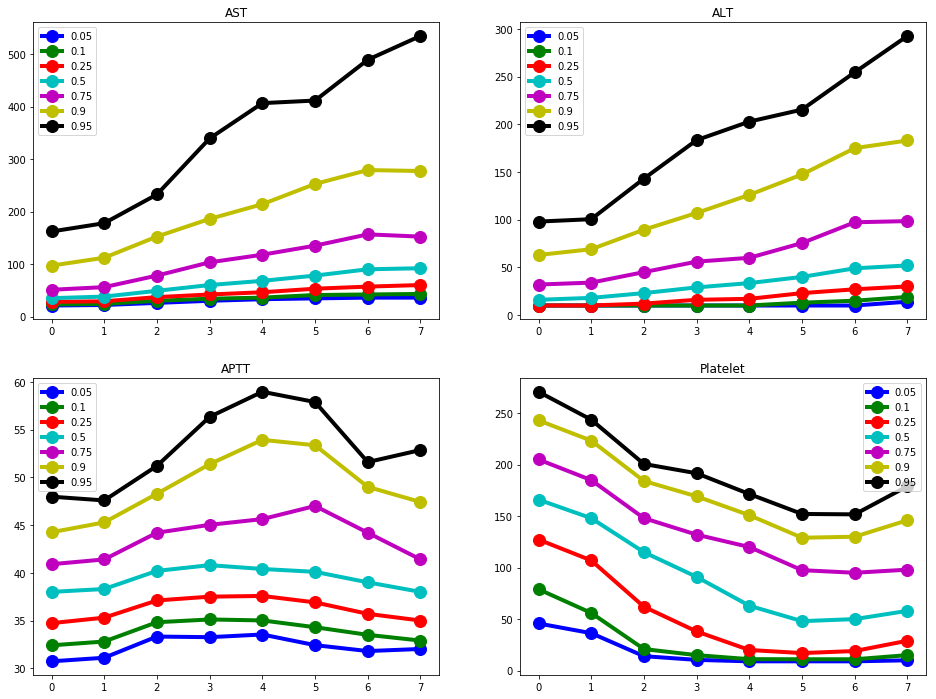

In [25]:
from matplotlib.pyplot import figure
figure(figsize=(16, 12))

data = []
plt.subplot(221)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]:
    quatiled = cur2_1.groupby('Day')['AST'].quantile(i).reset_index()

    data.append(go.Scatter(
        x = quatiled['Day'],
        y = quatiled['AST']
    ))

plt.plot( 'x', 'y', data=data[0], marker='o', color='blue', markersize=12,  linewidth=4, label = "0.05")
plt.plot( 'x', 'y', data=data[1], marker='o', color='g', markersize=12, linewidth=4, label = "0.1")
plt.plot( 'x', 'y', data=data[2], marker='o', color='r', markersize=12, linewidth=4, label = "0.25")
plt.plot( 'x', 'y', data=data[3], marker='o', color='c', markersize=12, linewidth=4, label = "0.5")
plt.plot( 'x', 'y', data=data[4], marker='o', color='m', markersize=12, linewidth=4, label = "0.75")
plt.plot( 'x', 'y', data=data[5], marker='o', color='y', markersize=12, linewidth=4, label = "0.9")
plt.plot( 'x', 'y', data=data[6], marker='o', color='k', markersize=12, linewidth=4, label = "0.95")
plt.title('AST')
plt.legend()
data = []
plt.subplot(222)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]:
    quatiled = cur2_2.groupby('Day')['ALT'].quantile(i).reset_index()

    data.append(go.Scatter(
        x = quatiled['Day'],
        y = quatiled['ALT']
    ))

plt.plot( 'x', 'y', data=data[0], marker='o', color='blue', markersize=12,  linewidth=4, label = "0.05")
plt.plot( 'x', 'y', data=data[1], marker='o', color='g', markersize=12, linewidth=4, label = "0.1")
plt.plot( 'x', 'y', data=data[2], marker='o', color='r', markersize=12, linewidth=4, label = "0.25")
plt.plot( 'x', 'y', data=data[3], marker='o', color='c', markersize=12, linewidth=4, label = "0.5")
plt.plot( 'x', 'y', data=data[4], marker='o', color='m', markersize=12, linewidth=4, label = "0.75")
plt.plot( 'x', 'y', data=data[5], marker='o', color='y', markersize=12, linewidth=4, label = "0.9")
plt.plot( 'x', 'y', data=data[6], marker='o', color='k', markersize=12, linewidth=4, label = "0.95")
plt.title('ALT')
plt.legend()
data = []

plt.subplot(223)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]:
    quatiled = cur2_3.groupby('Day')['APTT'].quantile(i).reset_index()

    data.append(go.Scatter(
        x = quatiled['Day'],
        y = quatiled['APTT']
    ))

plt.plot( 'x', 'y', data=data[0], marker='o', color='blue', markersize=12,  linewidth=4, label = "0.05")
plt.plot( 'x', 'y', data=data[1], marker='o', color='g', markersize=12, linewidth=4, label = "0.1")
plt.plot( 'x', 'y', data=data[2], marker='o', color='r', markersize=12, linewidth=4, label = "0.25")
plt.plot( 'x', 'y', data=data[3], marker='o', color='c', markersize=12, linewidth=4, label = "0.5")
plt.plot( 'x', 'y', data=data[4], marker='o', color='m', markersize=12, linewidth=4, label = "0.75")
plt.plot( 'x', 'y', data=data[5], marker='o', color='y', markersize=12, linewidth=4, label = "0.9")
plt.plot( 'x', 'y', data=data[6], marker='o', color='k', markersize=12, linewidth=4, label = "0.95")
plt.title('APTT')
plt.legend()

ppp = data
data = []

plt.subplot(224)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]:
    quatiled = cur2_4.groupby('Day')['Platelet'].quantile(i).reset_index()

    data.append(go.Scatter(
        x = quatiled['Day'],
        y = quatiled['Platelet']
    ))

plt.plot( 'x', 'y', data=data[0], marker='o', color='blue', markersize=12,  linewidth=4, label = "0.05")
plt.plot( 'x', 'y', data=data[1], marker='o', color='g', markersize=12, linewidth=4, label = "0.1")
plt.plot( 'x', 'y', data=data[2], marker='o', color='r', markersize=12, linewidth=4, label = "0.25")
plt.plot( 'x', 'y', data=data[3], marker='o', color='c', markersize=12, linewidth=4, label = "0.5")
plt.plot( 'x', 'y', data=data[4], marker='o', color='m', markersize=12, linewidth=4, label = "0.75")
plt.plot( 'x', 'y', data=data[5], marker='o', color='y', markersize=12, linewidth=4, label = "0.9")
plt.plot( 'x', 'y', data=data[6], marker='o', color='k', markersize=12, linewidth=4, label = "0.95")
plt.title('Platelet')
plt.legend()


# Observation of Not Fatal
* **AST**, **ALT**
    * both have the similar behaviour as those in **Fatal**. The only difference is that for **Not Fatal** the values are much smaller than those in **Fatal**
* relation between **APTT** and **Platelet**
    * **Fatal**: **APTT** > **Platelet** in General
    * **Not Fatal**: **APTT** < **Platelet** in General

In [35]:
com1 = []
com2 = []
s1 = []
s2 = []

for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]:
    quatiled1_1 = cur1_3.groupby('Day')['APTT'].quantile(i).reset_index()
    x = quatiled1_1['Day']
    y = quatiled1_1['APTT']
    s1 = pd.DataFrame([x, y])
    quatiled1_2 = cur1_4.groupby('Day')['Platelet'].quantile(i).reset_index()
    x = quatiled1_2['Day']
    y = quatiled1_2['Platelet']
    s2 = pd.DataFrame([x, y])
    com1.append([s1, s2])
    
    quatiled2_1 = cur2_3.groupby('Day')['APTT'].quantile(i).reset_index()
    x = quatiled2_1['Day']
    y = quatiled2_1['APTT']
    s1 = pd.DataFrame([x, y])
    quatiled2_2 = cur2_4.groupby('Day')['Platelet'].quantile(i).reset_index()
    x = quatiled2_2['Day']
    y = quatiled2_2['Platelet']
    s2 = pd.DataFrame([x, y])
    com2.append([s1, s2])               

In [36]:
com1

[[         0      1      2      3      4      5     6     7
  Day    0.0   1.00   2.00   3.00   4.00   5.00   6.0   7.0
  APTT  31.2  36.96  33.42  37.52  42.18  52.42  67.7  53.1,
               0     1    2    3     4    5    6    7
  Day        0.0   1.0  2.0  3.0  4.00  5.0  6.0  7.0
  Platelet  28.4  23.8  8.2  9.6  6.45  7.0  5.4  8.2],
 [         0      1      2      3      4      5     6     7
  Day    0.0   1.00   2.00   3.00   4.00   5.00   6.0   7.0
  APTT  31.5  38.22  34.14  38.04  42.66  52.65  67.7  53.1,
               0     1    2     3    4    5    6     7
  Day        0.0   1.0  2.0   3.0  4.0  5.0  6.0   7.0
  Platelet  37.8  34.6  9.2  10.2  6.9  8.0  6.8  10.4],
 [         0     1     2     3     4       5     6     7
  Day    0.0   1.0   2.0   3.0   4.0   5.000   6.0   7.0
  APTT  32.9  41.8  36.3  39.6  44.1  54.525  67.7  53.1,
               0     1     2     3     4     5     6     7
  Day        0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0
  Platelet  66.0 

In [37]:
com2

[[           0     1      2       3       4      5     6      7
  Day    0.000   1.0   2.00   3.000   4.000   5.00   6.0   7.00
  APTT  30.725  31.1  33.32  33.255  33.535  32.42  31.8  32.02,
                0      1     2     3    4    5    6     7
  Day        0.00   1.00   2.0   3.0  4.0  5.0  6.0   7.0
  Platelet  45.75  36.35  14.0  10.4  9.0  9.0  9.0  10.0],
 [         0     1      2      3      4     5     6     7
  Day    0.0   1.0   2.00   3.00   4.00   5.0   6.0   7.0
  APTT  32.4  32.8  34.82  35.11  35.01  34.3  33.5  32.9,
               0     1     2     3     4     5     6     7
  Day        0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0
  Platelet  79.0  56.0  20.9  15.0  11.1  11.0  11.0  15.0],
 [           0     1     2     3       4     5     6     7
  Day    0.000   1.0   2.0   3.0   4.000   5.0   6.0   7.0
  APTT  34.725  35.3  37.1  37.5  37.575  36.9  35.7  35.0,
                 0      1     2     3     4     5     6     7
  Day         0.00    1.0   2.0   3.0